<a href="https://colab.research.google.com/github/tizzce/MIS515/blob/main/Kidney_Stone_Prediction_Team_Pyton_MIS_515_Kaggle_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kidney Stone Prediction - Binary Classification

**Import library**

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

**Create dataframe**

In [ ]:
# Read and display the csv file
df = pd.read_csv("kidney-stone.csv")
display(df.head(5))

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


**Exploratory Data Analysis (EDA)**

In [ ]:
# Checking for NAN values
nan_values = df.isna().sum()
nan_values

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

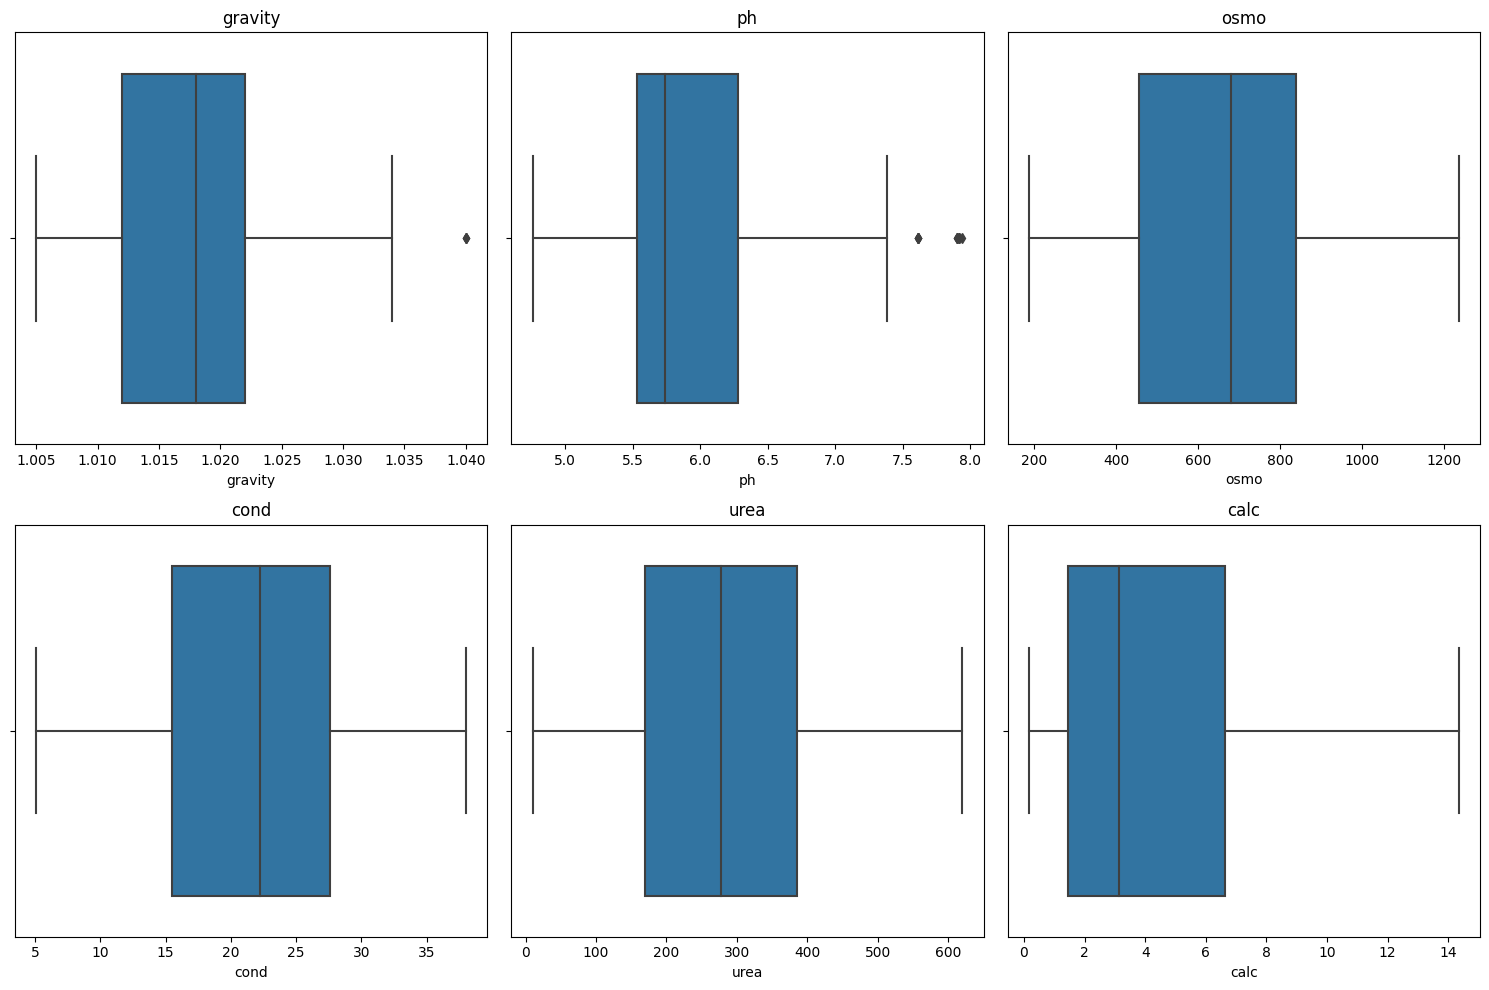

In [ ]:
# Checking for outliers using box plots for each feature
features = df.columns.drop(['id', 'target'])  # Exclude 'id' and 'target' from the analysis

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

In [ ]:
# Removing outliers using IQR method
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

# Defining the criteria to filter out the outliers
outlier_criteria = ((df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Removing the outliers
df_cleaned = df[~outlier_criteria]

# Number of rows before and after removing outliers
rows_before = len(df)
rows_after = len(df_cleaned)

rows_before, rows_after


(414, 399)

Text(0.5, 1.0, 'Correlation Matrix of Independent Variables')

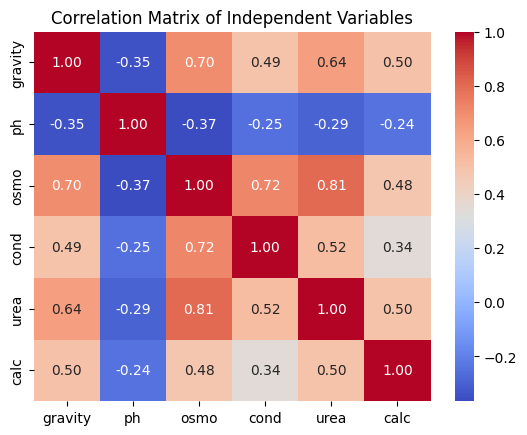

In [ ]:
# Checking for Multicollinearity
sns.heatmap(df_cleaned[features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Independent Variables")

The heat map indicated that some independent variables have moderate to high correlations with each other. For instance:
gravity and osmo show a correlation of 0.70.
osmo and urea have a correlation of 0.81.

But there are only 6 features, we decided to keep all of them.

**Build a Logistic Regression model**

In [ ]:
# Split the data into features (X) and target (y)
X = df_cleaned[features]

y = df_cleaned['target']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression Model
logisticRegr = LogisticRegression(solver='liblinear', max_iter=1000)
logisticRegr.fit(X_train, y_train)

# Predictions on the test set
y_pred = logisticRegr.predict(X_test)

**Evaluation Metrics**

In [ ]:
# Performing 5-fold cross-validation
k_folds = 5
scores = cross_val_score(logisticRegr, X, y, cv=k_folds, scoring='accuracy')

# Calculate the average score
average_score = scores.mean()

print("Accuracy scores:", scores)
print("Average score:", average_score)

Accuracy scores: [0.675      0.725      0.7375     0.8125     0.69620253]
Average score: 0.729240506329114


The accuracy varies across folds, it might indicate that the model is sensitive to the specific composition of the training data.

In [ ]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
# Extracting Sensitivity, Specificity, and F1 Score from the classification report
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

# Calculating the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)

In [ ]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Support:", support)
print("ROC_AUC Score:", roc_auc)

Precision: [0.8  0.88]
Recall: [0.93617021 0.66666667]
F1 Score: [0.8627451  0.75862069]
Support: [47 33]
ROC_AUC Score: 0.801418439716312


In [ ]:
# Classification Report
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        47
           1       0.88      0.67      0.76        33

    accuracy                           0.82        80
   macro avg       0.84      0.80      0.81        80
weighted avg       0.83      0.82      0.82        80



**Confusion Matrix**

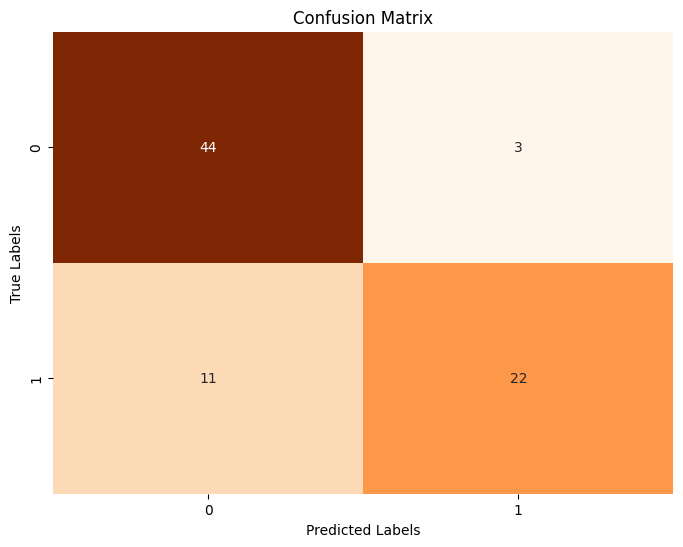

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Improving the Model**

In [ ]:
# Get the probability scores
probabilities = logisticRegr.predict_proba(X_test)[:, 1]

# Adjust the threshold
new_threshold = 0.31
new_predictions = (probabilities > new_threshold).astype(int)


# Evaluate the model
print(classification_report(y_test, new_predictions))

              precision    recall  f1-score   support

           0       0.94      0.66      0.78        47
           1       0.66      0.94      0.78        33

    accuracy                           0.78        80
   macro avg       0.80      0.80      0.78        80
weighted avg       0.82      0.78      0.78        80



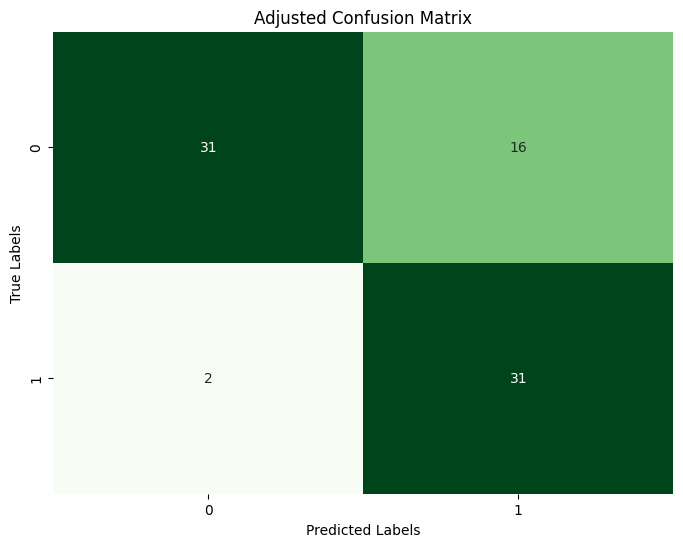

In [ ]:
new_conf_matrix = confusion_matrix(y_test, new_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(new_conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Adjusted Confusion Matrix')
plt.show()